In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load the data
df = pd.read_csv("admission_data.csv") # A dataset with exam scores and admission status


In [3]:
# Explore the data
print(df.head())
print(df.info())
print(df.describe())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA   
0           1        337          118                  4  4.5   4.5  9.65  \
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 

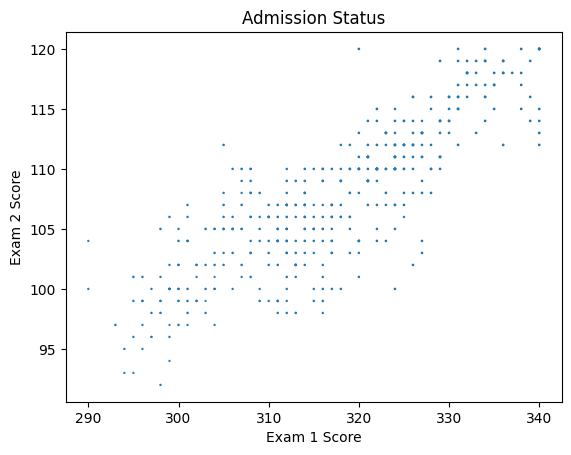

In [14]:
# Plot the data
plt.scatter(df["GRE Score"], df["TOEFL Score"], df["Chance of Admit "])
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.title("Admission Status")
plt.show()

In [24]:
# Split the data into features and target
X = df[["GRE Score", "TOEFL Score"]] # Feature matrix
y = df["Chance of Admit "] # Target vector

In [25]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn import preprocessing


#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)

#view transformed values
print(y_train)

[40 23 57 34 18 16 40 26 53 24 24 43  7 36 31 26 39 38 19 32 31 21 26 21
 39 28 22 31 33 22 37 13 16  6 46  8  6 53 34 40 25 28 25  3 57 45 33 35
 24 41 44 41 37 42 31 37 42 31 44 40 24 38 16 37 33 54  3 29 38 29 35 31
 38 53 12 46 17 56 14 27  2 24 52 24 23 34  7 28 43 31  0 38 21  8 57 23
 46 30 28 55 18 40 17 28 17 30 27 34 18 38 24 35 49 32 32 35 54 19 33 25
 35 57 40 42 41 52 12 44 41 49 36 22 33 29 31  5 11 30 56 49 51 41 53 36
 40 32 33 44 32 29 26 51 46 36 54 28 27 45 16 34 31 38 34 32 14 52 36 51
 37 36 39 23 32 18 51 17 15 36 30 44 12 38 48  6 28 52 39  9 35  3 16 20
 50 22 32  9 36 23 45 33 25 36 30 31 23 39 56 49 50 53  7 49 51 33 33 39
  4 38 33 47 42 27 32 40 14 42 44 10 12 22 21 30  6 34 22 51 27  7 45 26
 55 28 37 30 24 46 33 37 32 13 47 45 50 30 50 29 32 36 38 10 17 54 30  2
 41 38  9 35 25 22 25 24 12 25 40 37 49 39 22 40 36 30 36 47 48 51 53 25
  1 42  7 48 31 30 27 17 49 47 24 19 38 29 39 56 54 41 39 55 26 40 54 54
 55 24 53 56 47 32 17 22]


In [28]:
# Create a logistic regression model
model = LogisticRegression()

In [29]:
# Train the model on the train set
model.fit(X_train, y_train)

/home/thechemist54/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [32]:
# Evaluate the model performance
y_test = lab.fit_transform(y_test)
y_pred = lab.fit_transform(y_pred)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", acc)
print("Confusion Matrix:", cm)

Accuracy: 0.025
Confusion Matrix: [[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


/home/thechemist54/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


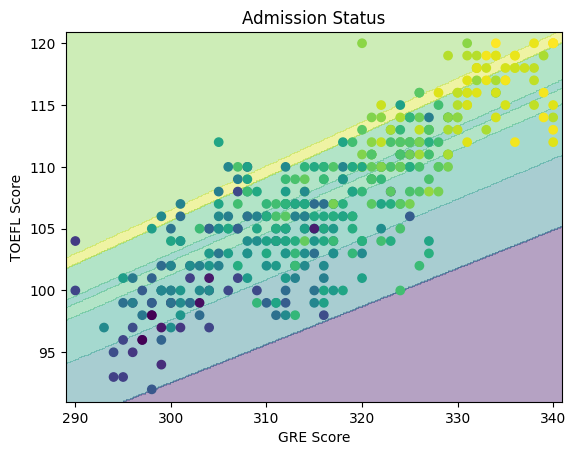

In [33]:
# Plot the decision boundary
x_min, x_max = X["GRE Score"].min() - 1, X["GRE Score"].max() + 1
y_min, y_max = X["TOEFL Score"].min() - 1, X["TOEFL Score"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X["GRE Score"], X["TOEFL Score"], c=y)
plt.xlabel("GRE Score")
plt.ylabel("TOEFL Score")
plt.title("Admission Status")
plt.show()

In [34]:
# Select a random student from the test set
index = np.random.randint(0, len(X_test))
student = X_test.iloc[index]

In [35]:
# Make a prediction for the student
prediction = model.predict(student.values.reshape(1, -1))

/home/thechemist54/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [36]:
# Print the prediction result
if prediction == 1:
    print("The student is predicted as admitted.")
else:
    print("The student is not predicted as admitted.")

The student is not predicted as admitted.


In [39]:
# Print the student's exam scores and actual admission status
print("The student's GRE score is:", student["GRE Score"])
print("The student's TOEFL score is:", student["TOEFL Score"])
print("The student's actual admission status is:", y_test[index])

The student's GRE score is: 308
The student's TOEFL score is: 103
The student's actual admission status is: 18
